In [249]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 

# Carga

In [250]:
## Importando os datasets com suas respectivas configurações

In [251]:
vixCasa = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixCasas.csv' , encoding='utf-16', sep='|')

In [252]:
vixApp = pd.read_csv(r'C:\Users\arthu\OneDrive\Projetos\0-GitHub\mlStuff\Projects\OlxHousePricePrediction\Extraction\data\vixApartamentos.csv' , encoding='utf-16', sep='|')

In [253]:
## Unindo os dados de Apartamentos e Casas
df = pd.concat([vixCasa, vixApp], ignore_index=True)

In [254]:
# Removemos a coluna codigo da olx pois não será importante para a análise. Além disso, fizemos alguns tratamentos nos nomes de alguns bairros
df = df.drop_duplicates(subset=(['Codigo']))
df['Bairro'] = df['Bairro'].map(lambda x : str.strip(x))
df['Bairro'] = df['Bairro'].replace(['São Pedro V'], ['São Pedro'])
df['Bairro'] = df['Bairro'].replace(['Comdusa'], ['Condusa'])

In [255]:
# Nesse bloco, carregamos o dataset com indices de alfabetização e salario meio por bairro na cidade de vitória.
# Além disso, foi feito algumas tratativas nos nomes dos bairros.
df_social_columns = ['bairro' , 'p+10' , 'p+10_alfabetizadas' ,'taxa_alfabetizacao'  , 'salarioMedio' ,'taxa-1salario' , 'taxa+1salario' , 'taxasemsalario' ]
df_social = pd.read_csv(r"C:\Users\arthu\OneDrive\Projetos\0-GitHub\projetoDataScienceFaesa\Extracoes\ijsn-censo\alfabetizacaoRendimento2010.csv" )
df_social.columns = df_social_columns
df_social = df_social[df_social['bairro'] != 'Vitória']
df_social['bairro'] = df_social['bairro'].map(lambda x : str.strip(x))
df_social['bairro'] = df_social['bairro'].replace(['Jardim Camburí'],['Jardim Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Morada de Camburí'],['Morada de Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Pontal de Camburí'],['Pontal de Camburi'])
df_social['bairro'] = df_social['bairro'].replace(['Republica'], ['República'])
df_social['bairro'] = df_social['bairro'].replace(['Santa Lucia'], ['Santa Lúcia'])
df_social['bairro'] = df_social['bairro'].replace(['Da Penha'], ['da Penha'])
df_social['bairro'] = df_social['bairro'].replace(['De Lourdes'], ['de Lourdes'])
df_social['bairro'] = df_social['bairro'].replace(['Do Moscoso'], ['do Moscoso'])
df_social['bairro'] = df_social['bairro'].replace(['São Cristovão'], ['São Cristóvão'])
df_social['bairro'] = df_social['bairro'].replace(['Antonio Honório'], ['Antônio Honório'])
df_social['Populacao'] = df_social['p+10' ] / 288311


In [256]:
# Foi realizado um merge com os datasets da OLX e dos indices.
temp = df_social[['bairro' ,'taxa_alfabetizacao', 'salarioMedio' , 'taxa+1salario' ,'taxa-1salario']].rename(columns={'bairro' : 'Bairro'})
df = df.merge(temp , on='Bairro' )

# Tratamento de dados

In [257]:
df.dtypes

Codigo                      int64
Descricao                  object
Link                       object
Page                        int64
Valor                      object
Categoria                  object
Tipo                       object
Área construída            object
Quartos                    object
Banheiros                  object
Vagas na garagem           object
CEP                         int64
Município                  object
Bairro                     object
Logradouro                 object
Detalhes do imóvel         object
Condomínio                 object
IPTU                       object
Detalhes do condominio     object
Área útil                  object
taxa_alfabetizacao        float64
salarioMedio              float64
taxa+1salario             float64
taxa-1salario             float64
dtype: object

### Alterando tipo de dados

In [258]:
# Necessario fazer algumas transformações nos dados para tranforma em float
df['Valor']= df['Valor'].map(lambda x : str(x).replace('R$ ','').replace('.','')).astype(float)

In [259]:
# também em relação a área, observamos que os dados eram preenchidos ou na coluna Area Util ou Area Construida. Dessa forma utilizamos o isnull para utilizar a area construida caso não tenhamos area Util.
df['Área útil'] =  df['Área útil'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Área construída'] = df['Área construída'].map(lambda x : str(x).replace('m²' ,'')).astype(float)
df['Area'] = df['Área útil'].fillna(df['Área construída'])

In [260]:
## Alguns tratamentos para transformar dados categoricos em dados numericos. Os imoveis com 5 ou mais Quartos, banheiros e vagas foram alterados para ter no máximo 5.
df['Quartos'] = df['Quartos'].map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Banheiros'] = df['Banheiros'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))
df['Vagas na garagem'] = df['Vagas na garagem'].fillna(0).map(lambda x : 5 if x=='5 ou mais' else int(x))

In [261]:
df.isna().sum()

Codigo                       0
Descricao                    0
Link                         0
Page                         0
Valor                       79
Categoria                    0
Tipo                         0
Área construída           5865
Quartos                      0
Banheiros                    0
Vagas na garagem             0
CEP                          0
Município                    0
Bairro                       0
Logradouro                4721
Detalhes do imóvel        2550
Condomínio                3780
IPTU                      4691
Detalhes do condominio    3936
Área útil                 2472
taxa_alfabetizacao           0
salarioMedio                 0
taxa+1salario                0
taxa-1salario                0
Area                       939
dtype: int64

In [262]:
# Mais um processo de remoção de colunas que não iremos utilizar
df.drop(['Link','Descricao','Área útil' , 'Área construída', 'Page' ,'Detalhes do imóvel', 'Condomínio', 'IPTU',
       'Detalhes do condominio', 'Logradouro','CEP', 'Município', 'Codigo'] , axis=1, inplace=True)

In [263]:
# Também julgamos importante remover imoveis sem banheiros ou quartos. Entendemos que sejam erros de preenchimento.
df = df[df['Banheiros'] >0]
df = df[df['Quartos'] >0]

In [264]:
# Agora sim, nosso dataset está pronto para as demais etapas.
df 

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
0,"150,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,110.00
1,"150,000.00",Casas,Venda - casa em rua pública,2,2,2,Itararé,95.25,"1,015.74",44.54,21.76,125.00
2,"150,000.00",Casas,Venda - casa em rua pública,2,2,1,Itararé,95.25,"1,015.74",44.54,21.76,115.00
3,"150,000.00",Casas,Venda - casa em rua pública,3,1,1,Itararé,95.25,"1,015.74",44.54,21.76,100.00
4,"190,000.00",Casas,Venda - casa em rua pública,2,1,1,Itararé,95.25,"1,015.74",44.54,21.76,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7393,"60,000.00",Casas,Venda - casa em rua pública,3,1,0,Cruzamento,93.77,910.76,34.11,27.61,100.00
7394,"32,000.00",Casas,Venda - casa em rua pública,2,1,0,Cruzamento,93.77,910.76,34.11,27.61,NaN
7395,"26,000.00",Apartamentos,Venda - apartamento padrão,2,2,1,Cruzamento,93.77,910.76,34.11,27.61,58.00
7396,"110,000.00",Apartamentos,Venda - apartamento padrão,1,1,0,Segurança do Lar,98.22,"1,681.78",58.61,15.05,38.00


### Análise e remoção de outliers

In [265]:
# Criamos uma função para calcular os limites inferiores e superiores das distribuições
def fncCalculaLimites(x):
    return x.quantile(0.75) + x.std()*1.5 , x.quantile(0.25) - x.std()*1.5 

##### Valor

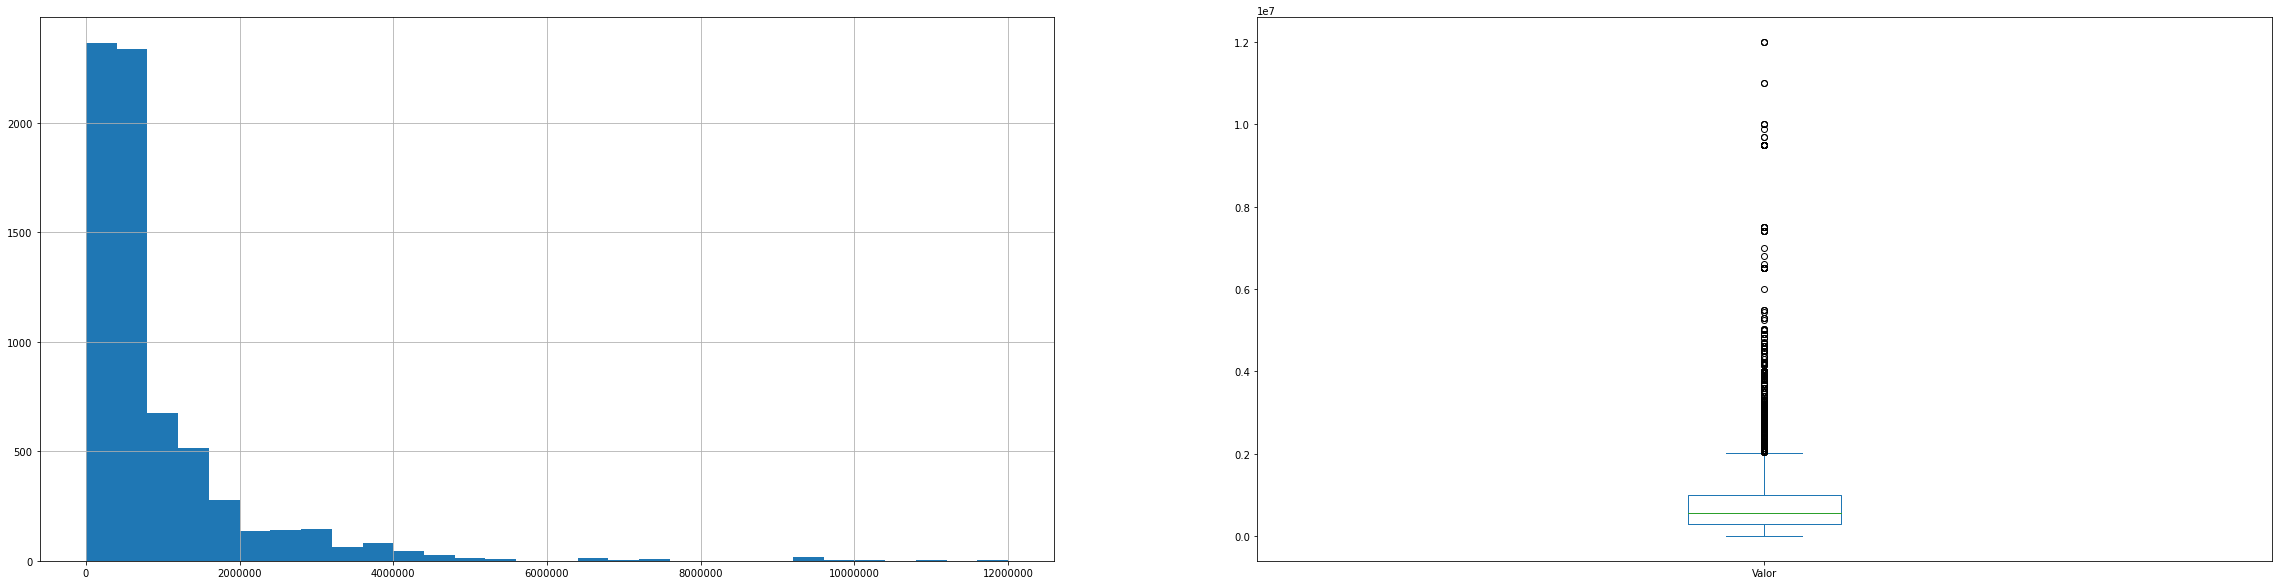

In [266]:
# Podemos observar que o valor dos apartamentos tem uma distribuição lognormal. Optamos por remover os outliers utilizando uma transformação de log2 na nossa variavel de valor, que é a variavel dependente. 
# É importante fazermos isso por a regressao linear espera que a variavel dependente tenha uma distribuição parecida a gausiana.
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

<AxesSubplot:>

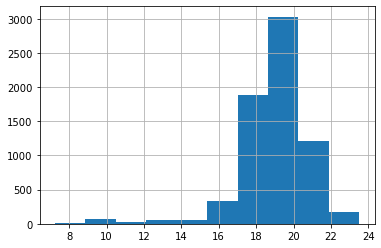

In [267]:
np.log2(df[df['Valor']>0]['Valor']).hist()

In [268]:
# Calculo de limites inferiores e superiores
fncCalculaLimites(np.log2(df[df['Valor']>0]['Valor']))

(22.736311478169775, 15.375360496617251)

In [269]:
# Log 15.37 na base 2 é aproximadamente 42mil
df[df['Valor']<=42000]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
38,"5,000.00",Casas,Venda - casa em rua pública,2,1,1,Itararé,95.25,"1,015.74",44.54,21.76,NaN
44,700.00,Casas,Venda - casa em rua pública,3,2,2,Itararé,95.25,"1,015.74",44.54,21.76,390.00
52,500.00,Casas,Venda - casa em rua pública,2,1,2,Itararé,95.25,"1,015.74",44.54,21.76,0.00
53,700.00,Casas,Venda - casa em rua pública,2,1,2,Itararé,95.25,"1,015.74",44.54,21.76,0.00
55,700.00,Casas,Venda - casa em rua pública,3,2,2,Itararé,95.25,"1,015.74",44.54,21.76,350.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7342,"10,000.00",Casas,Venda - casa em rua pública,3,2,2,Redenção,93.18,795.59,36.92,27.86,NaN
7376,650.00,Casas,Venda - casa em rua pública,1,1,0,Vila Rubim,97.25,"1,297.75",48.07,21.09,80.00
7391,"11,000.00",Casas,Venda - casa em rua pública,2,2,1,Nazareth,98.88,"2,121.99",60.75,11.21,0.00
7394,"32,000.00",Casas,Venda - casa em rua pública,2,1,0,Cruzamento,93.77,910.76,34.11,27.61,NaN


In [270]:
# Removendo outliers
df = df[(df['Valor']>42000) & (df['Valor']<=7000000)]

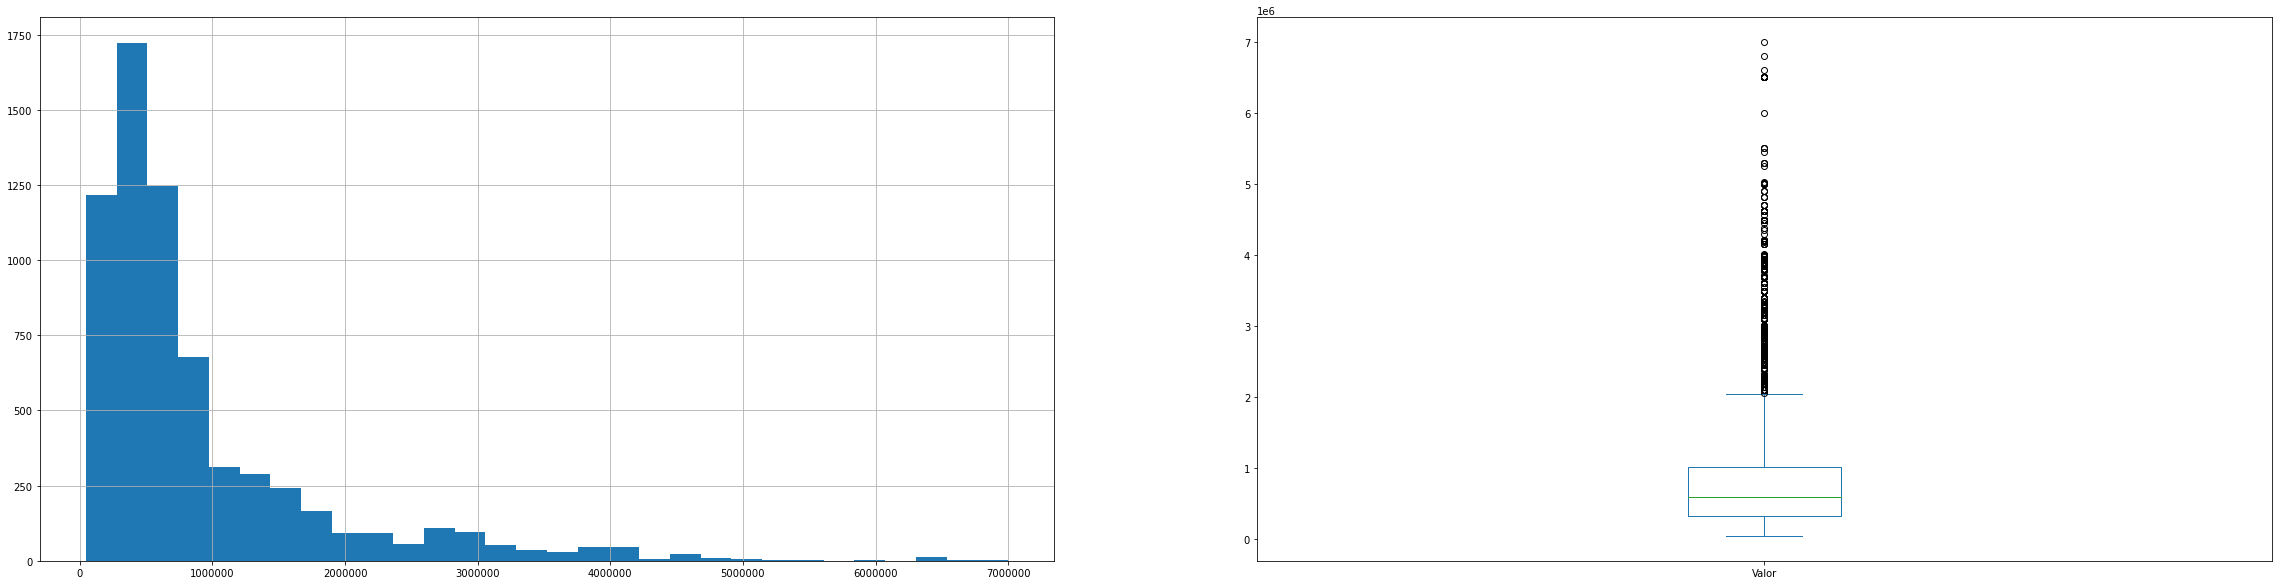

In [271]:
# Essa é a distribuição dos dados após a remoção dos outliers
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Valor'].hist(bins= 30)

plt.subplot(1,2,2)
df['Valor'].plot(kind = 'box')
plt.show()

##### Area

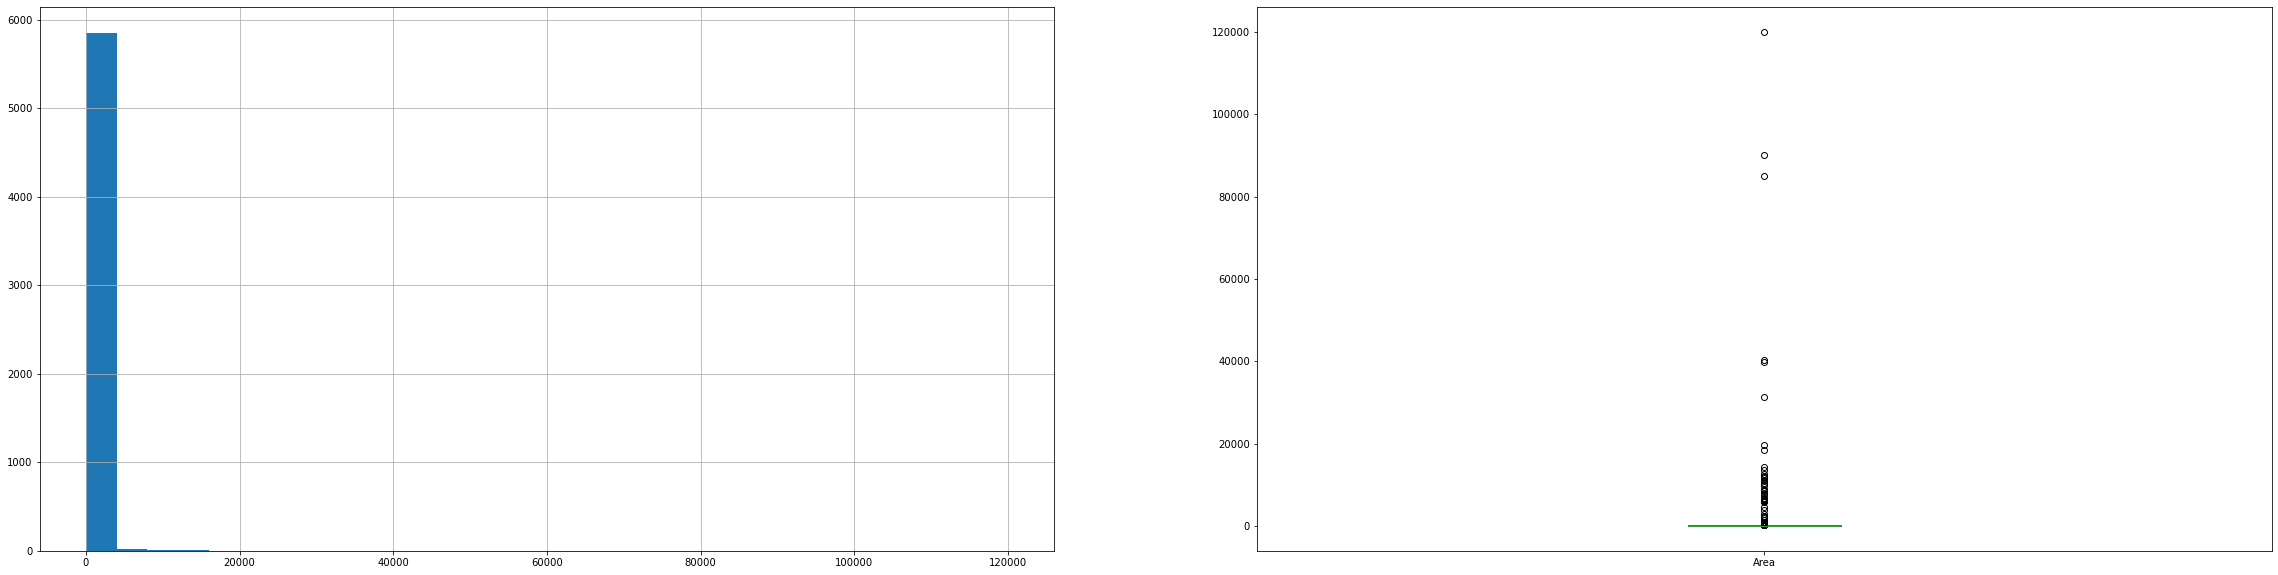

In [272]:
# Também identificamos dados muito discrepantes na area
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

In [273]:
# Temos 204 itens com area menores que 30m2  e podemos considerar erros de preenchimento
df[df['Area']<=30]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
23,"80,000.00",Casas,Venda - casa em rua pública,2,2,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
26,"250,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,0.00
27,"250,000.00",Casas,Venda - casa em rua pública,3,2,1,Itararé,95.25,"1,015.74",44.54,21.76,0.00
43,"120,000.00",Casas,Venda - casa em rua pública,2,1,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
45,"150,000.00",Casas,Venda - casa em rua pública,2,2,0,Itararé,95.25,"1,015.74",44.54,21.76,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7273,"790,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7287,"884,000.00",Apartamentos,Venda - apartamento padrão,3,3,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7327,"779,004.00",Apartamentos,Venda - apartamento padrão,3,2,2,Barro Vermelho,99.67,"5,419.79",68.36,3.80,0.00
7365,"100,000.00",Casas,Venda - casa em rua pública,3,2,0,Forte São João,94.97,"1,134.32",42.61,25.13,0.00


In [274]:
# Removendo valores com erro de preenchimento
df= df[df['Area']>30]

In [275]:
# Calculando limites superiores e inferiores
max , min = fncCalculaLimites(df['Area'])
[max, min]

[3989.322230295763, -3754.322230295763]

In [276]:
# Removendo outliers
max , min = fncCalculaLimites(df['Area'])
df = df[(df['Area'] > min) & (df['Area'] < max)]

In [277]:
df[((df['Area']>800) & (df['Categoria']=='Casas'))]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
189,"6,800,000.00",Casas,Venda - casa em rua pública,4,5,5,Santa Lúcia,99.16,"3,850.42",65.77,6.79,"1,500.00"
2451,"4,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,"1,000.00"
2496,"5,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,890.00
2498,"4,000,000.00",Casas,Venda - casa em rua pública,5,5,5,Ilha do Boi,98.24,"7,164.39",61.38,7.06,"1,000.00"
3207,"220,000.00",Casas,Venda - casa em rua pública,3,2,0,Centro,98.88,"2,393.05",64.23,10.60,818.00
3240,"400,000.00",Casas,Venda - casa em rua pública,3,2,2,Centro,98.88,"2,393.05",64.23,10.60,950.00
3469,"2,980,000.00",Casas,Venda - casa em rua pública,3,4,5,Fradinhos,98.27,"3,009.93",60.16,11.09,847.00
3495,"1,600,000.00",Casas,Venda - casa em rua pública,5,5,4,Fradinhos,98.27,"3,009.93",60.16,11.09,"1,102.00"
3496,"7,000,000.00",Casas,Venda - casa em rua pública,4,3,5,Fradinhos,98.27,"3,009.93",60.16,11.09,"2,300.00"
3656,"3,900,000.00",Casas,Venda - casa em rua pública,5,4,4,Mata da Praia,99.63,"5,986.95",65.09,3.72,840.00


In [278]:
# Removendo apartamentos com mais de 1000m2. 
# Consideramos como erro de preenchimento
df[((df['Area']>800) & (df['Categoria']=='Apartamentos'))]

,Valor,Categoria,Tipo,Quartos,Banheiros,Vagas na garagem,Bairro,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area
1377,"2,895,000.00",Apartamentos,Venda - apartamento cobertura,4,3,3,Jardim Camburi,99.40,"3,066.59",67.44,6.25,"2,413.00"
7033,"366,000.00",Apartamentos,Venda - apartamento padrão,1,1,1,Santa Luíza,99.29,"3,492.87",61.13,8.81,"3,827.00"
7392,"1,200,000.00",Apartamentos,Venda - apartamento padrão,5,5,0,Nazareth,98.88,"2,121.99",60.75,11.21,900.00


In [279]:
df = df[~((df['Area']>800) & (df['Categoria']=='Apartamentos'))]

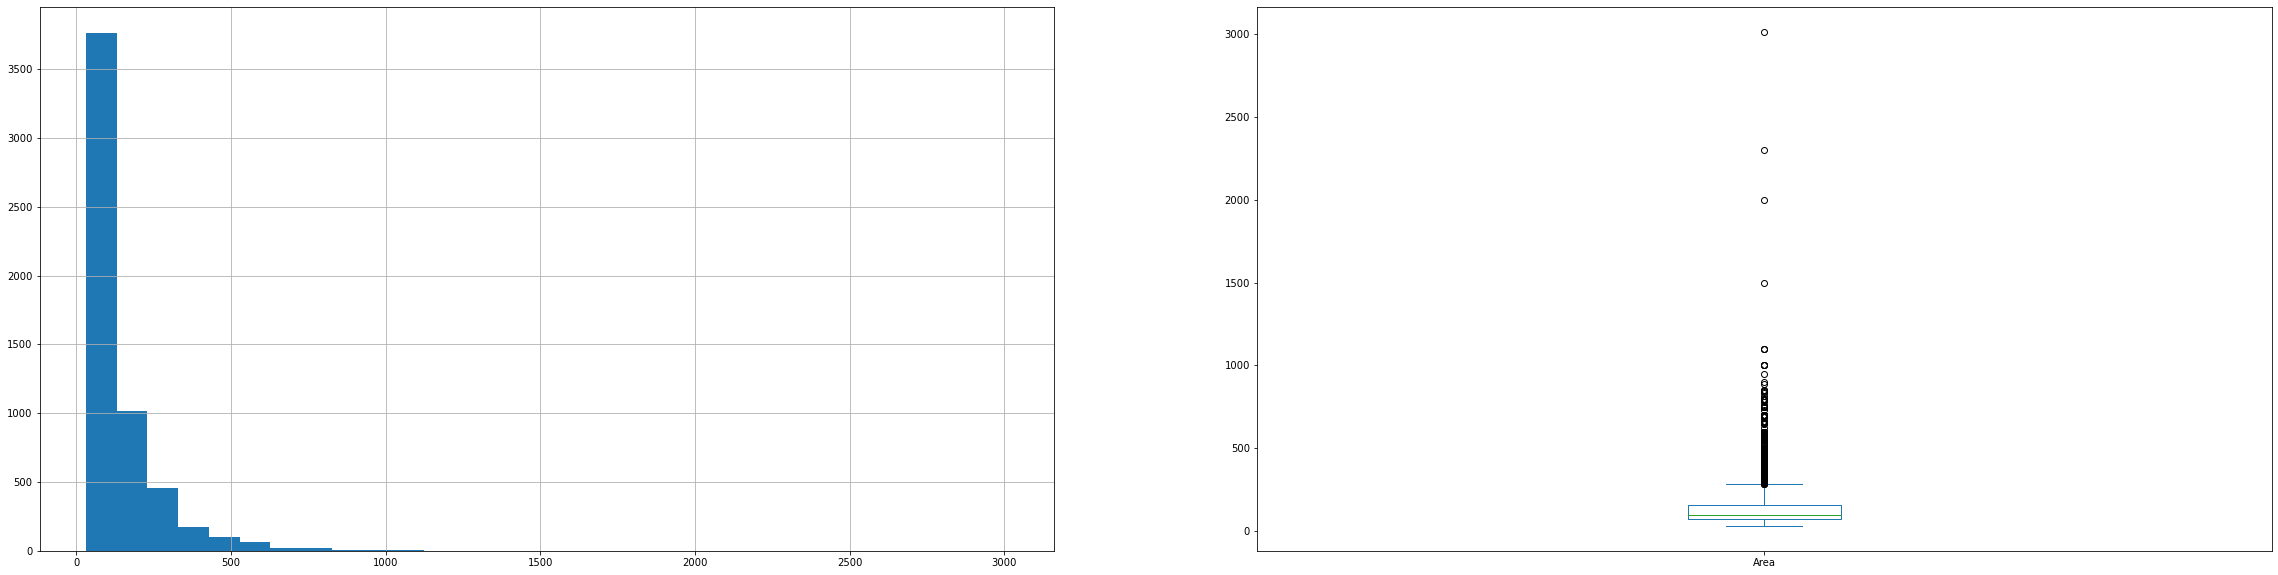

In [280]:
# Distribuição após remoção de outliers
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.ticklabel_format(style = 'plain')
df['Area'].hist(bins= 30)

plt.subplot(1,2,2)
df['Area'].plot(kind = 'box')
plt.show()

### Campos descritivos

##### Bairros

In [281]:
# Agora vamos observar os dados de bairros
df['Bairro'].value_counts()

Jardim Camburi       1779
Jardim da Penha       630
Praia do Canto        539
Mata da Praia         412
Bento Ferreira        356
                     ... 
Estrelinha              1
Mário Cypreste          1
Cruzamento              1
Segurança do Lar        1
Parque Industrial       1
Name: Bairro, Length: 71, dtype: int64

In [282]:
# De-para com as regiões dos bairros.
regioes ={
 'Itararé':  'Maruípe' ,
 'Santa Lúcia':  'Zona Leste' ,
 'Jardim Camburi': 'Jardim Camburi'  ,
 'Goiabeiras':  'Zona Norte' ,
 'Santa Helena':  'Zona Leste' ,
 'Ilha do Boi':   'Zona Leste',
 'Jucutuquara':  'Jucutuquara' ,
 'Praia do Canto': 'Zona Leste'  ,
 'Centro':  'Zona Sul' ,
 'Fradinhos':  'Jucutuquara' ,
 'Mata da Praia': 'Jardim da Penha'  ,
 "Joana D'arc":  'Maruípe' ,
 'Bento Ferreira':  'Jucutuquara' ,
 'de Lourdes':  'Jucutuquara' ,
 'República':  'Jardim da Penha' ,
 'Santa Cecília': 'Maruípe'  ,
 'Morada de Camburi': 'Jardim da Penha'  ,
 'Maruípe': 'Maruípe'  ,
 'Tabuazeiro': 'Maruípe'  ,
 'Maria Ortiz':  'Zona Norte' ,
 'Santo Antônio':  'Santo Antônio' ,
 'Santa Martha':  'Maruípe' ,
 'São Cristóvão':   'Maruípe',
 'Santos Reis': 'Zona Oeste'  ,
 'Enseada do Suá': 'Zona Leste'  ,
 'Santos Dumont':  'Maruípe' ,
 'Jardim da Penha':  'Jardim da Penha' ,
 'Universitário':  'Santo Antônio' ,
 'Solon Borges': 'Zona Norte'  ,
 'Santa Tereza':  'Santo Antônio' ,
 'Ilha do Frade':  'Zona Leste' ,
 'da Penha':  'Maruípe' ,
 'Horto': 'Jucutuquara'  ,
 'Santa Clara':   'Zona Sul',
 'São Pedro':  'Zona Oeste' ,
 'Parque Moscoso':  'Zona Sul'  ,
 'Consolação':  'Jucutuquara' ,
 'São Benedito':  'Maruípe' ,
 'Caratoíra': 'Santo Antônio'  ,
 'Grande Vitória':  'Santo Antônio' ,
 'Jesus de Nazareth': 'Jucutuquara'  ,
 'Romão': 'Jucutuquara'  ,
 'Bonfim':  'Maruípe' ,
 'Praia do Suá': 'Zona Leste'  ,
 'Mário Cypreste': 'Santo Antônio'  ,
 'Jabour': 'Zona Norte'  ,
 'Santa Luíza':  'Zona Leste' ,
 'São José': 'Zona Oeste'  ,
 'Pontal de Camburi': 'Jardim da Penha'  ,
 'Andorinhas':  'Maruípe' ,
 'Nova Palestina':  'Zona Oeste' ,
 'Boa Vista': 'Jardim da Penha'  ,
 'Redenção': 'Zona Oeste'  ,
 'Antônio Honório':  'Zona Norte' ,
 'Monte Belo':  'Jucutuquara' ,
 'Barro Vermelho':  'Zona Leste' ,
 'Resistência': 'Zona Oeste'  ,
 'Bela Vista':  	'Santo Antônio'  ,
 'Santo André':  'Zona Oeste' ,
 'Ilha do Príncipe':  'Zona Sul'  ,
 'Ilha de Santa Maria': 'Jucutuquara'  ,
 'Fonte Grande':  'Zona Sul' ,
 'Estrelinha':  'Santo Antônio' ,
 'Inhanguetá':  'Santo Antônio' ,
 'Vila Rubim':  'Zona Sul' ,
 'Cruzamento':  'Jucutuquara' ,
 'Ilha das Caieiras': 'Zona Oeste'  ,
 'do Moscoso': 'Zona Sul'  ,
 'Forte São João':  'Jucutuquara' ,
 'Segurança do Lar':  'Zona Norte' ,
 'Piedade' : 'Zona Sul',
 'Parque Industrial': 'Jardim Camburi'  ,
 'Nazareth' :'Jucutuquara'
}

In [283]:
# Como temos alguns bairros que não tem muita incidencia, teremos que criar grupos regionais para os bairros
df['Regiao'] = df['Bairro'].map(regioes)

In [284]:
df['Regiao'].value_counts()

Jardim Camburi     1780
Zona Leste         1470
Jardim da Penha    1140
Jucutuquara         508
Zona Sul            298
Maruípe             246
Zona Norte           97
Santo Antônio        55
Zona Oeste           47
Name: Regiao, dtype: int64

In [285]:
# Criamos o campo valor por M2 para fazermos algumas análises de bairro
df['ValorPorM2'] = df['Valor'] / df['Area']

In [286]:
bairros = df.groupby(['Regiao','Bairro'], as_index=False)['ValorPorM2'].mean()

In [287]:
bairros

,Regiao,Bairro,ValorPorM2
0,Jardim Camburi,Jardim Camburi,"7,090.98"
1,Jardim Camburi,Parque Industrial,"5,909.09"
2,Jardim da Penha,Boa Vista,"2,534.52"
3,Jardim da Penha,Jardim da Penha,"6,657.15"
4,Jardim da Penha,Mata da Praia,"9,359.00"
...,...,...,...
66,Zona Sul,Ilha do Príncipe,"3,218.34"
67,Zona Sul,Parque Moscoso,"2,093.47"
68,Zona Sul,Santa Clara,"1,557.79"
69,Zona Sul,Vila Rubim,"3,534.01"


In [288]:
# Também observamos o valor por m2 por região
df.groupby(['Regiao'])['ValorPorM2'].agg(['mean','std']).sort_values(by ='mean', ascending = False)

,mean,std
Regiao,,
Zona Leste,"9,414.93","4,028.71"
Jardim da Penha,"7,412.83","3,303.50"
Jardim Camburi,"7,090.31","2,339.92"
Jucutuquara,"5,567.29","2,771.37"
Zona Norte,"2,921.09","1,781.98"
Maruípe,"2,787.68","2,099.95"
Santo Antônio,"2,597.20","1,683.82"
Zona Sul,"2,470.10","1,096.77"
Zona Oeste,"1,362.46","1,315.18"


In [289]:
df.groupby('Regiao')['Vagas na garagem'].mean()

Regiao
Jardim Camburi    1.67
Jardim da Penha   1.85
Jucutuquara       1.69
Maruípe           1.36
Santo Antônio     1.84
Zona Leste        1.99
Zona Norte        1.52
Zona Oeste        1.64
Zona Sul          0.78
Name: Vagas na garagem, dtype: float64

##### Tipo Classificação

In [290]:
# observamos que o tipo do imovel poderia ser agrupado em dois grupos, Classe A e Classe B. Classe A são os imoveis que geralmente são mais caros, e o classe B os demais
TipoClassificação ={
'Venda - apartamento cobertura' : 'Classe A',
'Venda - apartamento duplex/triplex' : 'Classe A',
'Venda - apartamento kitchenette' : 'Classe B', 
'Venda - apartamento padrão' : 'Classe B',
'Venda - casa em condominio fechado' : 'Classe A',
'Venda - casa em rua pública' : 'Classe B',
'Venda - casa em vila' : 'Classe B',
'Venda - loft/studio' : 'Classe A'
}

In [291]:
df['TipoClasse']= df['Tipo'].map(TipoClassificação)

In [292]:
# Observamos que realmente há uma diferença nas médias desses imoveis.
df.groupby('TipoClasse')['ValorPorM2'].agg(['mean','std', 'count'])

,mean,std,count
TipoClasse,,,
Classe A,"8,527.69","3,324.08",292
Classe B,"6,947.38","3,680.60",5349


##### Area root

<AxesSubplot:xlabel='Valor', ylabel='Area'>

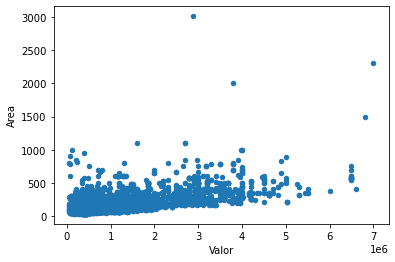

In [293]:
# Observamos que há uma dispersão com os dados de Area
df.plot(kind = 'scatter' , x='Valor' , y='Area')

In [294]:
# Optamos por criar outra variavel utilizando a raiz quadrada da Area para reduzir a dispersão
df['Area2'] = df['Area']**(1/2)

<AxesSubplot:xlabel='Valor', ylabel='Area2'>

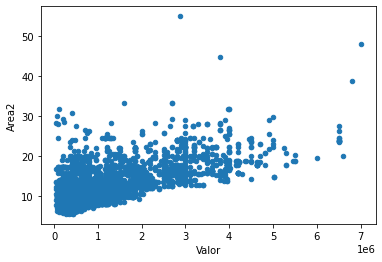

In [295]:
df.plot(kind = 'scatter' , x='Valor' , y='Area2')

In [296]:
df.corr()

,Valor,Quartos,Banheiros,Vagas na garagem,taxa_alfabetizacao,salarioMedio,taxa+1salario,taxa-1salario,Area,ValorPorM2,Area2
Valor,1.00,0.61,0.68,0.67,0.19,0.55,0.18,-0.31,0.64,0.55,0.69
Quartos,0.61,1.00,0.67,0.55,0.07,0.24,0.07,-0.13,0.59,0.11,0.70
Banheiros,0.68,0.67,1.00,0.55,0.11,0.36,0.12,-0.20,0.55,0.25,0.65
Vagas na garagem,0.67,0.55,0.55,1.00,0.09,0.33,0.09,-0.18,0.53,0.33,0.58
taxa_alfabetizacao,0.19,0.07,0.11,0.09,1.00,0.49,0.92,-0.92,-0.06,0.36,-0.06
salarioMedio,0.55,0.24,0.36,0.33,0.49,1.00,0.54,-0.68,0.23,0.52,0.25
taxa+1salario,0.18,0.07,0.12,0.09,0.92,0.54,1.00,-0.94,-0.08,0.39,-0.08
taxa-1salario,-0.31,-0.13,-0.20,-0.18,-0.92,-0.68,-0.94,1.00,-0.01,-0.45,-0.01
Area,0.64,0.59,0.55,0.53,-0.06,0.23,-0.08,-0.01,1.00,-0.09,0.96
ValorPorM2,0.55,0.11,0.25,0.33,0.36,0.52,0.39,-0.45,-0.09,1.00,-0.07


In [297]:
df.drop(['ValorPorM2'], axis = 1 , inplace =True)

# Modelagem

### Pre Processamento

In [298]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [299]:
# Realizamos o split dos dados utiliando 80/20 para dados de treino e teste respectivamente
x_train, x_test, y_train ,y_test = train_test_split(df.drop('Valor', axis=1), df['Valor'], test_size= 0.2 , random_state=19)

#### Dummy categories

In [300]:
# Após isso, foi necessário utilizar o oneHotEncoder para transformar os dados categoricos
encoderCategoria = OneHotEncoder()

In [301]:
categories = encoderCategoria.fit_transform(x_train[['Categoria']])

In [302]:
categories = pd.DataFrame(categories.toarray(), columns = encoderCategoria.get_feature_names_out(), index = x_train.index)

In [303]:
x_train = x_train.join(categories).drop('Categoria', axis= 1)

In [304]:
encoderRegiao = OneHotEncoder()

In [305]:
regiao = encoderRegiao.fit_transform(x_train[['Regiao']])

In [306]:
regiao = pd.DataFrame(regiao.toarray(), columns= encoderRegiao.get_feature_names_out(), index= x_train.index)

In [307]:
x_train = x_train.join(regiao).drop('Regiao', axis = 1)

In [308]:
encoderTipo = OneHotEncoder()

In [309]:
tipo = encoderTipo.fit_transform(x_train[['TipoClasse']])

In [310]:
tipo = pd.DataFrame(tipo.toarray() , columns= encoderTipo.get_feature_names_out(), index = x_train.index)

In [311]:
x_train = x_train.join(tipo).drop('TipoClasse', axis = 1)

#### Normalizacao

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
# Então, normalizamos os dados de area
norm = StandardScaler()

In [314]:
x_train['Area'] = norm.fit_transform(x_train[['Area']])

In [315]:
norm2 = StandardScaler()

In [316]:
x_train['Area2'] = norm2.fit_transform(x_train[['Area2']])

### Modelo

<AxesSubplot:>

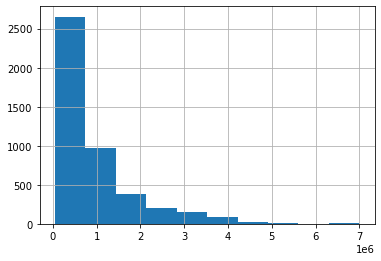

In [317]:
# Conforme havíamos comentando, regressão linear espera que a variavel dependente tenha uma distribuição semelhante a gausiana, o que não acontece em nosso caso.
y_train.hist()

In [318]:
# Foi necessario aplicar a função de log2 para normalizar nossa distribuição
y_train = np.log2(y_train)

<AxesSubplot:>

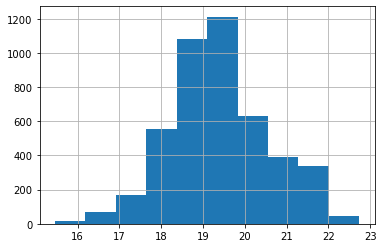

In [319]:
# Resultado da aplicação de log2
# Distribuição muito mais próxima de uma distribuição normal
y_train.hist()

In [320]:
# Selecionamos as variaveis para o nosso modelo
x_train = x_train.select_dtypes(include = np.number)

In [321]:
from sklearn.linear_model import LinearRegression

In [322]:
# Iremos utilizar o LinearRegression da biblioteca sklearn
regressao = LinearRegression()

In [323]:
# Demos o fit no modelo
regressao.fit(x_train, y_train)

LinearRegression()

In [324]:
# e obtivemos um R2 de 0.78 com os dados de treino
regressao.score(x_train, y_train)

0.7814824290715399

#### Validação

Agora vamos testar com os dados de teste

In [325]:
# Aplicando as transformações nas variaveis
categories = encoderCategoria.transform(x_test[['Categoria']])

In [326]:
categories = pd.DataFrame(categories.toarray(), columns= encoderCategoria.get_feature_names_out(), index = x_test.index)

In [327]:
x_test = x_test.join(categories).drop('Categoria', axis = 1)

In [328]:
regioes = pd.DataFrame(encoderRegiao.transform(x_test[['Regiao']]).toarray() , columns = encoderRegiao.get_feature_names_out(), index =x_test.index)

In [329]:
x_test = x_test.join(regioes).drop('Regiao', axis =1)

In [330]:
tipo = pd.DataFrame(encoderTipo.transform(x_test[['TipoClasse']]).toarray() , columns = encoderTipo.get_feature_names_out(), index =x_test.index)

In [331]:
x_test = x_test.join(tipo).drop(['Tipo','TipoClasse'], axis =1)

In [332]:
x_test['Area'] = norm.transform(x_test[['Area']])

In [333]:
x_test['Area2'] = norm2.transform(x_test[['Area2']])

In [334]:
# Também aplicamos a transformação de log nos dados de teste
x_test = x_test.select_dtypes(include = np.number)
y_test = np.log2(y_test)

In [335]:
# Obtivemos um R2 de 78 também com os dados de teste
regressao.score(x_test, y_test)

0.7816968085777999

In [336]:
# Utilizando a função cross_val_score, podemos testar nosso modelo com n folds diferentes
from sklearn.model_selection import cross_val_score

In [337]:
# Utilizando 5 folds, nosso modelo obteve um r2 médio de 77.81
testes = cross_val_score(regressao , x_train, y_train, cv = 5)

In [338]:
[testes.mean(), testes.std()]

[0.7781567118872129, 0.01815895244983564]

In [339]:
# Esses sãos os coeficientes do nosso modelo.
# Podemos observar como as variaveis de Area e a Regiao do imovel tem grande impacto no valor do mesmo
pd.Series(regressao.coef_  , index = x_train.columns).sort_values(ascending= False)

Area2                     0.58
Regiao_Zona Leste         0.54
Regiao_Jardim da Penha    0.32
Regiao_Jardim Camburi     0.32
Vagas na garagem          0.28
taxa_alfabetizacao        0.21
Quartos                   0.21
Categoria_Apartamentos    0.17
TipoClasse_Classe A       0.17
Regiao_Zona Norte         0.17
Banheiros                 0.15
Regiao_Jucutuquara        0.12
salarioMedio              0.00
taxa-1salario            -0.01
Regiao_Santo Antônio     -0.02
taxa+1salario            -0.02
TipoClasse_Classe B      -0.17
Categoria_Casas          -0.17
Regiao_Maruípe           -0.20
Area                     -0.28
Regiao_Zona Sul          -0.47
Regiao_Zona Oeste        -0.79
dtype: float64

Agora iremos calcular o Median Absolute Error (Mediana do erro absoluto)

In [340]:
y_predict = regressao.predict(x_test)

In [341]:
from sklearn.metrics import median_absolute_error

In [342]:
y_predict2 = 2**y_predict

In [343]:
y_test2 = 2**y_test

In [344]:
# Obtivemos um erro mediano de 142.183,92 reais.
median_absolute_error(y_test2, y_predict2)

142183.92906364775